In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [2]:
df=pd.read_csv("jjj.csv")

In [3]:
df=df.drop("PC_BTH",1)

In [4]:
df.head()

,DATE,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),Height (Re14-cb) (m)
0,2013/8/20,189.000000,17.5,0.880000,22.000000,1692.000000
1,2014/6/20,1148.583333,39.5,0.218333,209.166667,3420.333333
2,2014/6/21,741.000000,56.0,0.255000,0.000000,2706.000000
3,2014/7/17,1828.000000,61.0,0.110000,51.000000,4462.000000
4,2014/8/18,399.000000,14.0,0.410000,0.000000,2000.000000


In [47]:
df=df[df["Precipitation (mm day$^{-1}$)"]>0]

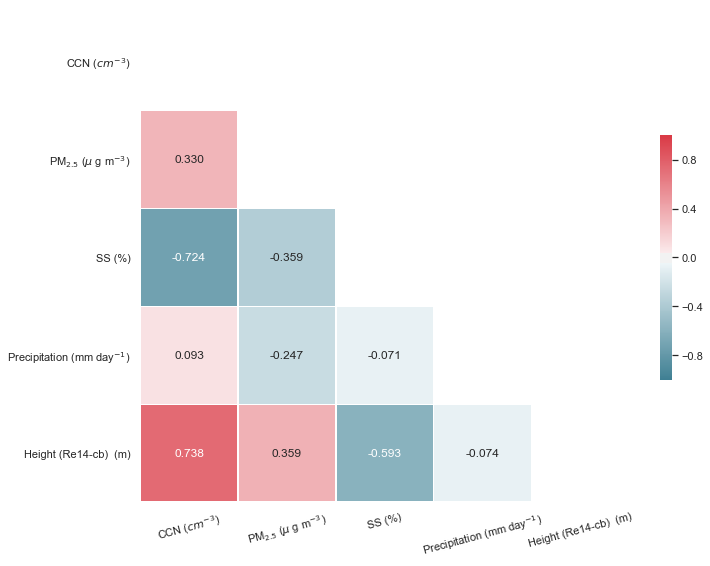

In [5]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("BTH_corr_num1-allrain.png",dpi=600)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.set_index('DATE', inplace=True)

In [8]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "jjj_profilerain.html")

In [9]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,9.519,62,two-sided,9.657030e-14,"[672.43, 1029.9]",2.38,5.021e+10,1.0


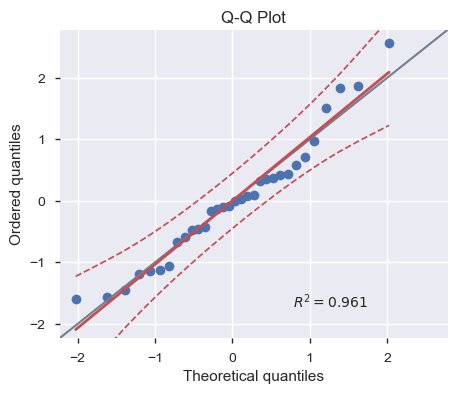

In [10]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [11]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,32,0.093,"[-0.26, 0.43]",0.009,-0.06,0.613836,0.248,0.079


In [12]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["PM$_{2.5}$ ($\mu$ g m$^{-3}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,32,0.33,"[-0.02, 0.61]",0.109,0.047,0.065419,1.116,0.464


In [13]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,32,-0.724,"[-0.86, -0.5]",0.525,0.492,0.000003,7846.614,0.999


In [14]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,32,0.738,"[0.52, 0.86]",0.545,0.513,0.000001,1.45e+04,0.999


In [15]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,32,0.221,"[-0.14, 0.53]",0.049,-0.017,0.22351,0.232


pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Precipitation (mm day$^{-1}$)', subject='PC_BTH')

pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='PM$_{2.5}$ ($\mu$ g m$^{-3}$)', subject='PC_BTH')

pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='SS (%)', subject='PC_BTH')

pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Height (Re14-cb)  (m)', subject='PC_BTH')